# Geopandas Overview
## Adam Bakopolus - SIADS 521 Assignment 3

### Visualization Technique and Library Overview

The visualization technique that I will eventually build to throughout the demonstration is a chloropleth plot through use of the geopandas library (with intermediate steps and explanations throughout detailing the processes, functions, logic, etc. that can be utilized within the geopandas library, as well, in tandem with pandas and matplotlib). A chloropleth is a plot that displays a particular region of interest (in the demonstration, the US state of Maine) and assigns a color to particular sub-areas within the region depending on a value in a column of interest. This color pattern is a clear visual way of denoting both similarities and differences between areas as it relates to certain measurements, demographics, etc. For instance, if average age of a particular region was an area of focus and there were 3 sub-areas within the region with average ages of 45, 76, and 78 years old, respectively, the expectation within a chloropleth plot is that the regions with average ages of 76 and 78 would be a similar color and would differ sharply from the sub-area with an average age of 45 years old, allowing for conclusions to be drawn on a population visually.

While a chloropleth plot is the final figure that is generated from the below demonstration, the intermediate steps of the demonstration do display, more generally, how geographially-based plots can even be generated, as well, through use of the geopandas library. These geographically-based plots are perfect when shapefiles (.shp) and their necessary accompanying files (.cpg, .dbf, for example) are readily available for use. Geopandas, as can be discerned from its name, is closely related and can behave pretty similarly at times to the pandas library. Geopandas can read in .shp files and create GeoDataFrames (again similarly to the DataFrames that pandas can create). However, the major difference of a GeoDataFrame to a pandas DataFrame is that a geometry column is specified that is unique to when .shp files are read in. When a GeoDataFrame is plot (which can be done through the geopandas library, as well), the geometry is what is seen on the plot (an example of geometry may be a line or a polygon with varying values that define its space). Centroids of these geometries can also be identified through geopandas, allowing for annotation of the plots, as well. Geopandas' similarly to pandas is also ideal when there is other data of interest available that may not have come in through the .shp files. A GeoDataFrame can be joined to a DataFrame allowing for great flexibility when attempting to plot areas and values of interest. 

In regards to the chloropleth and geographical-based plotting, this does, in a sense have similarities with a wide range of other types of plots, like scatter plots, bar graphs, etc. However, chloropleths go a step beyond these plots. While a scatter plot would just give an (x, y) point for a value for an area of interest, the chloropleth takes a scatter into consideration and clearly visually displays the relationship of a point to all other points. Those on the top right of a scatter can clearly be differentiated from those on the bottom left, and the added benefit of the chloropleth is that this relationship is now presented geographically when this is a need.

As noted above, the library that is being used for the demonstration is geopandas and is an extremely valuable library for chloropleths and geographical plotting in general as it has the capability of creating GeoDataFrames and plotting the geometry data needed to spatially arrange the data. Geopandas is open-source and a community-driven library. While created in 2013 by Kelsey Jordahl, there is now a team of both core developers and volunteer contributors that are responsible for the geopandas library. As will be seen below, conda can be used to install geopandas for use with the following command: `conda install geopandas`. When installed, geopandas does integrate well within the Jupyter Notebook environment. In researching the geopandas library, there did appear to be other options available that aid/thrive in geographically-based plotting, like geoplot, for instance. However, geopandas worked very well using its own plot function and paired well with matplotlib's subplot functionality, so this approach was used for the demonstration as there was familiarity already with the mechanics behind matplotlib's plotting to allow for plots overlayed over one another. In terms of declarative vs. procedural, geopandas is similar to pandas and is a declarative library. A simple function of read_file() or GeoDataFrame() can meet the needs of geographical plotting, requiring little need for procedures to be generated.

### Geopandas Demonstration

Prior to beginning work with geopandas, the library will need to be installed on the Jupyter Notebook. This can be handled by utilizing conda and running the code below.

In [1]:
conda install geopandas

geopandas, along with pandas itself and pyplot from matplotlib can then be imported into the notebook for use.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#### Read in Shapefile with geopandas and Discuss GeoDataFrame

As noted earlier, working with geopandas very closely resembles the processes and data structures seen with pandas itself. A major difference to note is that while pandas may utilize a "read_excel" or "read_csv" function to pull in data into a DataFrame or Series format, geopandas will utilize a "read_file" function and pull in a .shp or shapefile.

_Note:_  while "read_file" only calls the .shp file itself, for the shapefile to be read in appropriately and successfilly, all other accompanying files (.dbf, .shx, etc.) must also be available in the same folder and play a role in generating the correct GeoDataFrame.

The data that is being pulled in is from 2017, at a State County level, and is from the US Census government website where they store yearly cartographic boundary files: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html. 

When running the print and .head() steps below, you will see that gpd.read_file will generate a GeoDataFrame and that the structure of the GeoDataFrame is very similar to a pandas DataFrame. The major difference is the geometry field, which dictates the shape and position of where the row's data can be displayed in a plot.

In [3]:
census = gpd.read_file('cb_2017_us_county_500k.shp')

print(type(census))
census.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>


STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      01      005  00161528  0500000US01005  01005  Barbour   06  2292144656   
1      01      023  00161537  0500000US01023  01023  Choctaw   06  2365869837   
2      01      035  00161543  0500000US01035  01035  Conecuh   06  2201948618   

     AWATER                                           geometry  
0  50538698  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
1  19144469  POLYGON ((-88.47323 31.89386, -88.46888 31.930...  
2   6643480  POLYGON ((-87.42720 31.26436, -87.42551 31.268...

#### Plotting with GeoDataFrames

Similarly to how we can use a plot() function with matplotlib and specify figure size, the same can be done with a GeoDataFrame and geopandas. When a GeoDataFrame is plotted, the geometry is what is plotted on a figure. The geometry, again, being shapes at the US state county level, which is shown below.

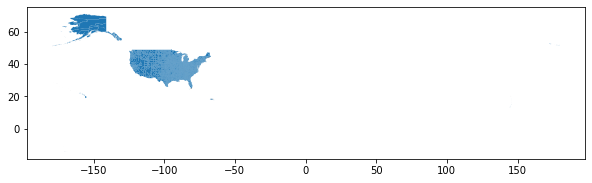

In [4]:
census.plot(figsize = (10,10))

Currently, this is not super helpful for visualizing anything meaningful (especially at a county level) as Alaska, Hawaii, and a few United States territories are included in the dataset from the US census department. The process below cleans the dataset, to just include states on the mainland. This is done by combining the "isin" function with "~" which essentially acts as a "NOT" to remove US territories, Alaska, and Hawaii based on their State FIPS number. The cleaned GeoDataFrame is then again plotted.

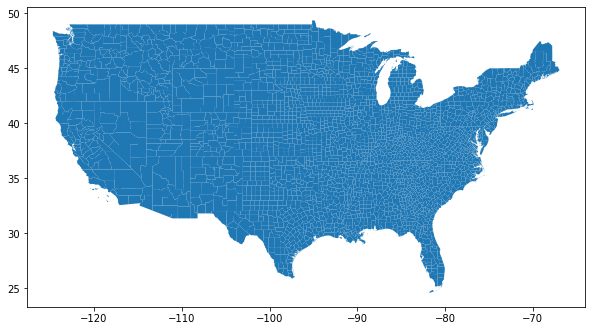

In [5]:
census_clean = census[~census.STATEFP.isin(['60', '66', '69', '72', '78', '02', '15'])]
census_clean.plot(figsize = (10,10))

Another valuable tool that will be used later on in this demonstration that is a benefit of the GeoDataFrame geometry is that a plot of just boundaries can also be done (and again, as will be seen later, can be overlayed in a subplot). With the geometry of the file being at a county level, the boundaries of every county can be seen below.

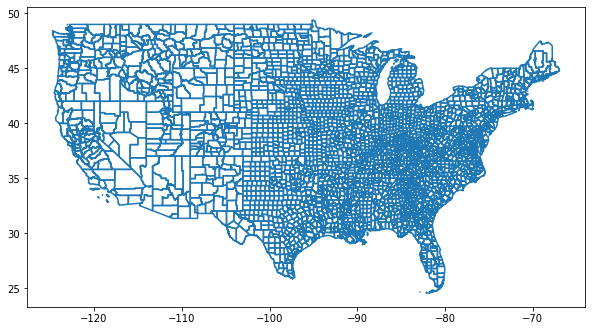

In [6]:
census_clean.boundary.plot(figsize = (10,10))

#### Investigate Maine Population and Income Per Capita

I'm currently living in Maine so, for the bulk of this demonstration, I wanted to create a visualization relevant to an area I'm most familiar with. To do so, I limited the cleaned census data set to just Maine counties (again through the State FIPS code field in the data). To differentiate between counties, cmap can be set to a wide range of color options, but I chose one of the pastel variations. The plot of Maine counties and the data itself can be seen below.

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID          NAME LSAD  \
108       23      015  00581293  0500000US23015  23015       Lincoln   06   
398       23      007  00581289  0500000US23007  23007      Franklin   06   
399       23      017  00581294  0500000US23017  23017        Oxford   06   
400       23      027  00581299  0500000US23027  23027         Waldo   06   
401       23      031  00581301  0500000US23031  23031          York   06   
741       23      003  00581287  0500000US23003  23003     Aroostook   06   
1349      23      021  00581296  0500000US23021  23021   Piscataquis   06   
1364      23      011  00581291  0500000US23011  23011      Kennebec   06   
1640      23      009  00581290  0500000US23009  23009       Hancock   06   
1641      23      019  00581295  0500000US23019  23019     Penobscot   06   
2469      23      029  00581300  0500000US23029  23029    Washington   06   
2604      23      005  00581288  0500000US23005  23005    Cumberland   06   
2656      23      013  00581292  0500000US23013  23013          Knox   06   
2926      23      001  00581286  0500000US23001  23001  Androscoggin   06   
3144      23      025  00581298  0500000US23025  23025      Somerset   06   
3181      23      023  00581297  0500000US23023  23023     Sagadahoc   06   

            ALAND      AWATER  \
108    1180630792   631357625   
398    4395190350   121369621   
399    5379066664   256039480   
400    1890577548   318053597   
401    2566235154   722302593   
741   17278038056   405253238   
1349  10259016062  1080049539   
1364   2246806176   216724439   
1640   4110284976  1963056852   
1641   8798662789   414019982   
2469   6637326498  1800003936   
2604   2164393695   988818232   
2656    945693972  2017106965   
2926   1211961731    75575386   
3144  10164120486   437867472   
3181    657803472   300569614   

                                               geometry  
108   MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...  
398   POLYGON ((-70.83554 45.29380, -70.82755 45.296...  
399   POLYGON ((-71.08000 45.30699, -71.07841 45.306...  
400   MULTIPOLYGON (((-68.94229 44.28436, -68.94063 ...  
401   MULTIPOLYGON (((-70.61725 42.99202, -70.61467 ...  
741   POLYGON ((-70.01975 46.59217, -69.99709 46.695...  
1349  POLYGON ((-69.83118 45.73860, -69.82943 45.738...  
1364  POLYGON ((-70.13259 44.37138, -70.12005 44.372...  
1640  MULTIPOLYGON (((-68.03522 44.33274, -68.03375 ...  
1641  POLYGON ((-69.35567 45.07347, -69.24996 45.087...  
2469  MULTIPOLYGON (((-67.32259 44.61160, -67.32174 ...  
2604  MULTIPOLYGON (((-69.94153 43.73007, -69.93734 ...  
2656  MULTIPOLYGON (((-68.55926 44.04502, -68.55504 ...  
2926  POLYGON ((-70.48529 44.06040, -70.45974 44.086...  
3144  POLYGON ((-70.55279 45.66784, -70.54730 45.666...  
3181  MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...

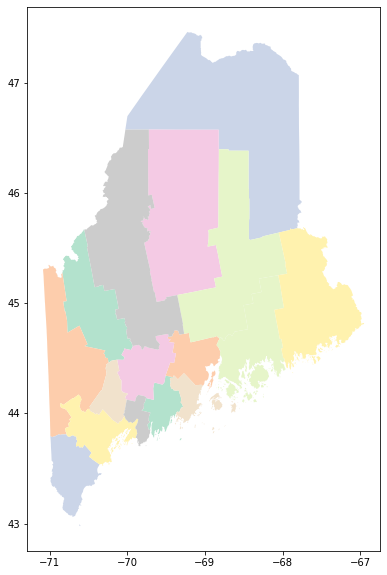

In [7]:
maine = census_clean[census_clean.STATEFP.isin(['23'])]
maine.plot(cmap = 'Pastel2', figsize = (10, 10))
maine

However, if you aren't familiar with Maine, even a color-coded display of counties will not be particularly helpful. The code below (which is commented to help explain the approach) creates a subplot of 3 plots: the same plot as above, a boundary plot of Maine counties to allow for clear demarcation of the counties, and a plot that annotates the display with the name of each county.

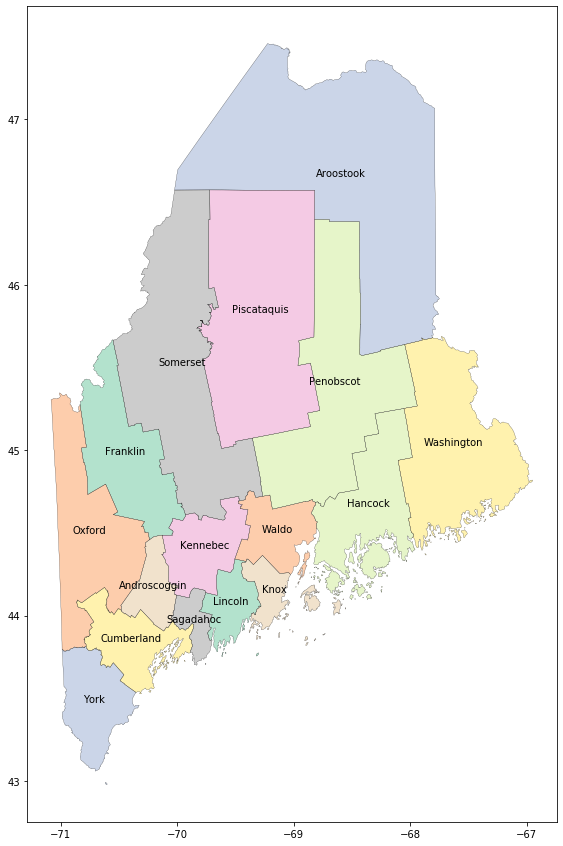

In [8]:
#Create a figure through matplotlib operations
fig = plt.figure(figsize = (15,15))
#maine_plot will be a subplot within the figure created above
maine_plot = fig.add_subplot(111)

#This code goes through each row (axis = 1) of the Maine data set, and while doing so annotates the maine_plot with county name (NAME)
#The geometry.centroid.coords[0] logic gives x and y points that are in the center of the geometry specified in the .shp file
#Horizontal alignment and font size can then also be specified
maine.apply(lambda x: maine_plot.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize= 10), axis=1)

#Boundary plot in the subplot that gives the boundary of the Maine counties, sets the lines to black and 
#the line width controls how bold the line will be
maine.boundary.plot(ax = maine_plot, color = 'black', linewidth = 0.2)

#This plot takes the Maine dataset same as before and plots it in the subplot
maine.plot(ax = maine_plot, cmap = 'Pastel2')

With the 16 counties now all labelled, I was interested in displaying meaningful demographic information on top of the plot, as well. For this, I decided to use the total population data already available in the GeoDataFrame and pull in other 2017 county data available through Kaggle that gives additional demographics around the population, with one being Income per capita (https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2017_county_data.csv).

To pull in this data from Kaggle, pandas was used to read in the .csv file. The file was limited to Maine counties only again and a regex was used to set the County columns from "Waldo County", for example, to just "Waldo" to allow for the join between the DataFrame and GeoDataFrame. Once the data was cleaned, the Kaggle dataset was inner joined to the census data by County name and now there was one table that had all the data combined. 

However, there was one problem with this. Following a merge through pandas, the combined dataset maine_demo was made into a DataFrame. An additional step was needed following this merge to convert the DataFrame into a GeoDataFrame and reset the geometry that would be used for plotting.

In [9]:
demographics = pd.read_csv('acs2017_county_data.csv')
demographics = demographics[demographics['State'] == 'Maine'].reset_index()
demographics['County'].replace(' [\w]*', '', regex = True, inplace = True)

maine_demo = pd.merge(demographics, maine, how = 'inner', left_on = 'County', right_on = 'NAME')
maine_demo = gpd.GeoDataFrame(maine_demo, geometry = 'geometry')

maine_demo.head(2)

index  CountyId  State        County  TotalPop    Men  Women  Hispanic  \
0   1177     23001  Maine  Androscoggin    107317  52550  54767       1.8   
1   1178     23003  Maine     Aroostook     68840  34006  34834       1.1   

   White  Black  ...  STATEFP  COUNTYFP  COUNTYNS        AFFGEOID  GEOID  \
0   91.1    1.6  ...       23       001  00581286  0500000US23001  23001   
1   94.5    0.9  ...       23       003  00581287  0500000US23003  23003   

           NAME  LSAD        ALAND     AWATER  \
0  Androscoggin    06   1211961731   75575386   
1     Aroostook    06  17278038056  405253238   

                                            geometry  
0  POLYGON ((-70.48529 44.06040, -70.45974 44.086...  
1  POLYGON ((-70.01975 46.59217, -69.99709 46.695...  

[2 rows x 48 columns]

With this new combined table now available, the GeoDataFrame can again be plotted use a similar approach to the first subplot that was created. The difference for this round revolves around the annotation itself. TotalPop and IncomePerCap are formatted as strings with commas every third digit, and a long concatenation across 3 lines (using the '\n' to add a line) is performed to display this demographic information.

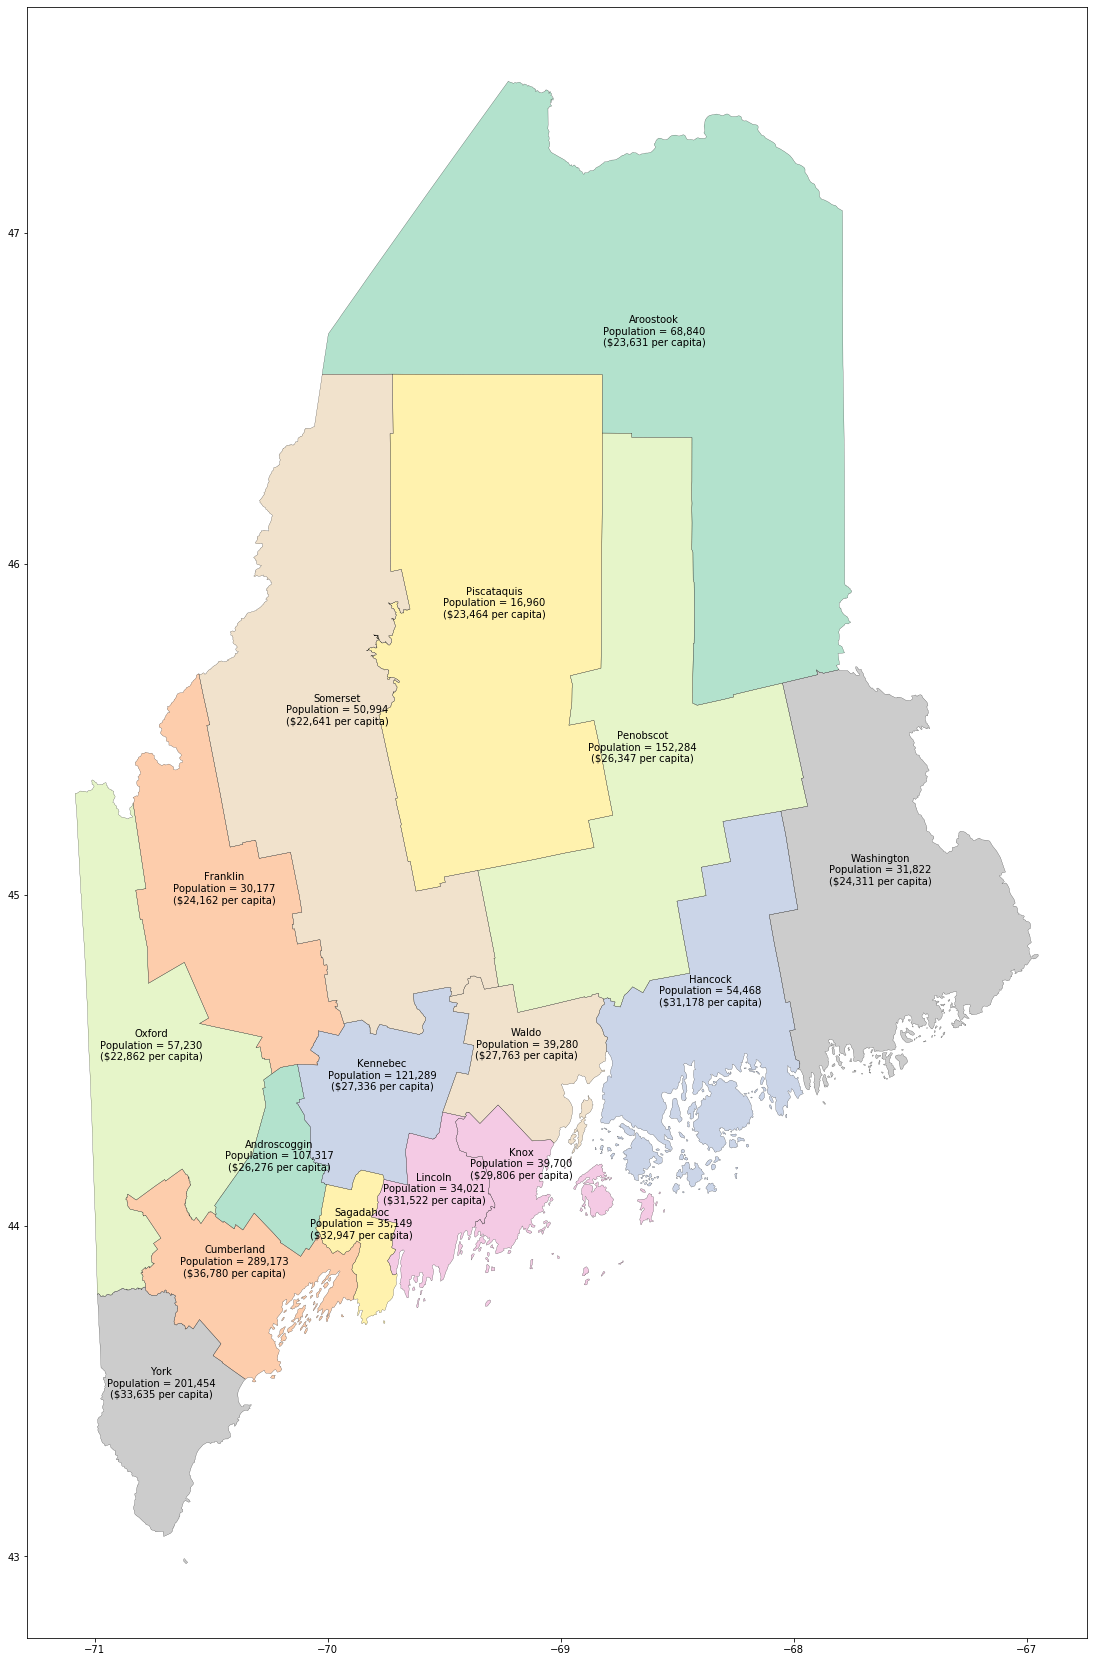

In [10]:
fig2 = plt.figure(figsize = (30, 30))
maine_plot2 = fig2.add_subplot(111)

maine_demo.apply(lambda x: maine_plot2.annotate(
    x.NAME + '\n' + 'Population = ' + str("{:,}".format(x.TotalPop)) + '\n' '($' + str("{:,}".format(x.IncomePerCap)) + ' per capita)', 
    xy=x.geometry.centroid.coords[0], ha='center', fontsize= 10), axis=1)

maine_demo.boundary.plot(ax = maine_plot2, color = 'black', linewidth = 0.2)
maine_demo.plot(ax = maine_plot2, cmap = 'Pastel2')

While this is definitely a valuable and meaningful way to display demographics, even expanding the figure to 15x15 lead to a very crowded and messy display when annotations run longer than a couple of lines. Geopandas does also allow for differences to be displayed in certain regions through a wide range of other clearer ways. The approach I'll focus on for this demonstration will be a chloropleth.

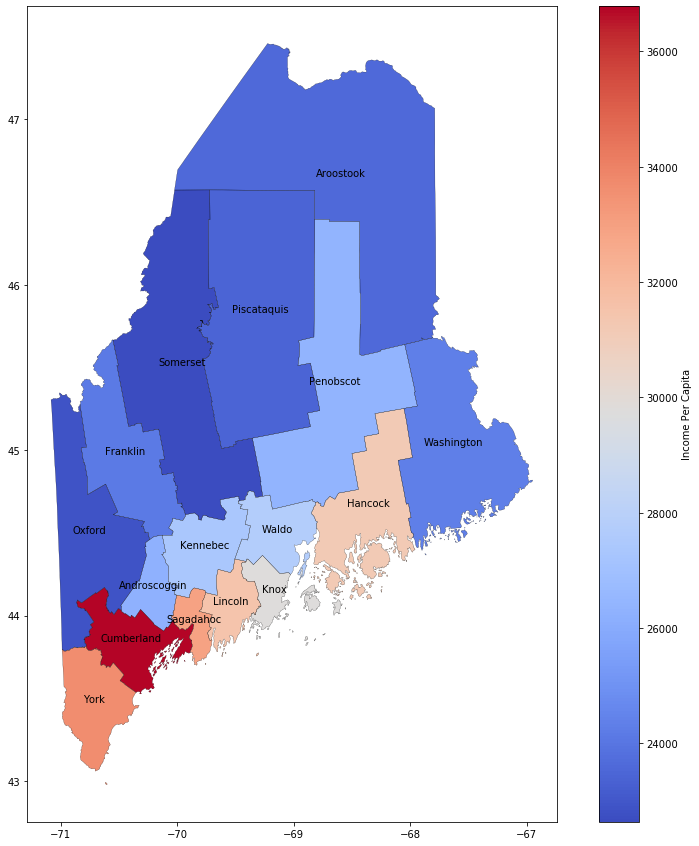

In [11]:
fig3 = plt.figure(figsize = (15, 15))
maine_plot3 = fig3.add_subplot(111)

maine_demo.apply(lambda x: maine_plot3.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize= 10), axis=1)

maine_demo.boundary.plot(ax = maine_plot3, color = 'black', linewidth = 0.2)
maine_demo.plot(ax = maine_plot3, column = 'IncomePerCap', legend = True, cmap = 'coolwarm',
               legend_kwds = {'label': 'Income Per Capita'})

This plot followed a similar approach to the other subplots in how the boundaries and labels were plotted, but the difference for this display is that a particular demographic column was specified in the plot function. A chloropleth was thus created based on the value within this field and by specifying legend = True, the viewer now has a very clear and easy way to evaluate income per capita across Maine. From this graph, it is immediately clear that Southern Maine typically has higher earners relative to Northern Maine. While a chloropleth is one option that can be used, I saw in my research that cartograms and heat maps are also options through the geopandas and the GeoDataFrame. It's clear that geopandas is a very powerful tool in intaking .shp files and generating meaningful insights from demographics, etc. at a geographical level. 

#### Resources and References

https://jcutrer.com/python/learn-geopandas-plotting-usmaps

https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d

Multiple Sections within the documentation itself: 

https://geopandas.org/index.html
    
https://geopandas.org/docs/user_guide/mapping.html
    
https://geopandas.org/gallery/plotting_with_geoplot.html

https://geopandas.org/about/team.html